<a href="https://colab.research.google.com/github/spch88/my_project/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BE%D1%82%D0%B7%D1%8B%D0%B2%D0%BE%D0%B2_%D0%BD%D0%B0_%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%BE%D0%B1%D0%B8%D0%BB%D1%8C_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В данном домашнем задании предоставляется возможность поработать с задачей по распознаванию позитивных и негативных отзывы людей по автомобилю Tesla. База для обучения содержит два текстовых файла с рядом строчных отзывов с мнением людей об автомобиле Tesla, соответственно негативного и позитивного содержания. Ссылка на скачивание базы уже включена в ноутбук задания.


Необходимо выполнить следующие действия:

  1. Загрузите саму базу по ссылке и подговьте файлы базы для обработки.
  2. Создайте обучающую и проверочную выборки, обратив особое внимание на балансировку базы: количество примеров каждого класса должно быть примерно одного порядка.
  3. Подготовьте выборки для обучения и обучите сеть. Добейтесь результата точности сети в 85-90% на проверочной выборке.
   


**Импорт библиотек, загрузка базы и подготовка её к предобработке.**

In [ ]:
import gdown
import os

In [ ]:
gdown.download('https://storage.googleapis.com/terra_ai/DataSets/tesla.zip', None, quiet=True)

'tesla.zip'

**Деление общей базы отзывов на данные для обучения и проверки.**

In [ ]:
# Распаковка архива в папку writers
!unzip -qo tesla.zip -d tesla/

# Просмотр содержимого папки
!ls tesla

'Негативный отзыв.txt'	'Позитивный отзыв.txt'


**Загрузка текста из файлов, преобразование в одну строку.**

In [ ]:
# Объявляем функции для чтения файла. На вход отправляем путь к файлу
def read_text(file_name):

  # Задаем открытие нужного файла в режиме чтения              
  read_file = open(file_name, 'r')

  # Читаем текст     
  text = read_file.read()

  # Переносы строки переводим в пробелы              
  text = text.replace("\n", " ")

  # Возвращаем текст файла       
  return text                          

# Объявляем интересующие нас классы
class_names = ["Негативный отзыв", "Позитивный отзыв"]

# Считаем количество классов 
num_classes = len(class_names)

**Тексты в один список.**

In [ ]:
# Создаём список под тексты для обучающей выборки
texts_list = []

# Циклом проводим итерацию по текстовым файлам в папке отзывов
for j in os.listdir('/content/tesla/'):

  # Добавляем каждый файл в общий список для выборки
        texts_list.append(read_text('/content/tesla/' + j))
        
        # Выводим на экран сообщение о добавлении файла
        print(j, 'добавлен в обучающую выборку')

Позитивный отзыв.txt добавлен в обучающую выборку
Негативный отзыв.txt добавлен в обучающую выборку


In [ ]:
# Узнаем объём каждого текста в словах и символах
texts_len = [len(text) for text in texts_list]

# Устанавливаем "счётчик" номера текста
t_num = 0

# Выводим на экран  информационное сообщение
print(f'Размеры текстов по порядку (в токенах):')

# Циклом проводим итерацию по списку с объёмами текстов
for text_len in texts_len:

  # Запускаем "счётчик" номера текста
  t_num += 1
  
  # Выводим на экран сообщение о номере и объёме текста
  print(f'Текст №{t_num}: {text_len}')

Размеры текстов по порядку (в токенах):
Текст №1: 213381
Текст №2: 134535


Далее рассчитаем, сколько символов составит 80% объёма каждого текста, чтобы по полученному индексу отделить эти 80% на обучающую и оставшиеся 20% на проверочную выборку. Эти значения необходимы для подготовки деления на выборки слайсингом по индексу.

In [ ]:
# Создаём список с вложенным циклом по длинам текстов, где i - 100% текста, i/5 - 20% текста 
train_len_shares = [(i - round(i/5)) for i in texts_len]

# Устанавливаем "счётчик" номера текста
t_num = 0

# Циклом проводим итерацию по списку с объёмами текстов равными 80% от исходных
for train_len_share in train_len_shares:

  # Запускаем "счётчик" номера текста
  t_num += 1
  
  # Выводим на экран сообщение о номере и объёме текста в 80% от исходного
  print(f'Доля 80% от текста №{t_num}: {train_len_share} символов')

Доля 80% от текста №1: 170705 символов
Доля 80% от текста №2: 107628 символов


Импортируем функцию **chain()** для добавления текстов в каждую выборку.

---
 Дополнительная информация: ([База знаний УИИ  - **"Методы работы со списками: функция chain( )**"](https://colab.research.google.com/drive/1KJKg_WYD8Vq63cciOMBEEAhFpyPv0A0V?usp=sharing/))

---

Произведём нарезку (метод слайсинга) по полученному ранее индексу для формирования текстов отдельно для обучающей(80%) и проверочной(20%) выборок:

In [ ]:
from itertools import chain
# Ваше решение

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation 

In [ ]:
# для начала сбалансируем базу данных, примерно уравняв количество примеров с отзывами
texts_list[0] = texts_list[0][:135000]

for text in texts_list:
  print(len(text))  

135000
134535


In [ ]:
# зададим параметры преобразования текста
VOCAB_SIZE = 10000        # размер словаря
WIN_SIZE   = 100         # ширина окна
WIN_HOP    = 20          # шаг окна разбиения текста на векторы

# создаем токенизатор и строим частотный словарь по текстам
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', 
                          lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

tokenizer.fit_on_texts(texts_list)
    
# построение словаря в виде пар слово - индекс
items = list(tokenizer.word_index.items())

print(f'Длина словаря: {len(items)}')

Длина словаря: 10281


In [ ]:
# разделим текст на обучающую и тестовую выборки
test_train, test_test = [],[]
for i in range(num_classes):
  n_div = int(len(texts_list[i])*0.8)
  test_train.append(texts_list[i][:n_div])
  test_test.append(texts_list[i][n_div:])

In [ ]:
# преобразование обучающих и проверочных текстов в последовательность индексов согласно частотному словарю
seq_train = tokenizer.texts_to_sequences(test_train)
seq_test = tokenizer.texts_to_sequences(test_test)

In [ ]:
# воспользуемся готовыми функциями

# Функция разбиения последовательности на отрезки скользящим окном
# На входе - последовательность индексов, размер окна, шаг окна
def split_sequence(sequence, win_size, hop):
    # Последовательность разбивается на части до последнего полного окна
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]

# Функция формирования выборок из последовательностей индексов
# формирует выборку отрезков и соответствующих им меток классов в виде one hot encoding
def vectorize_sequence(seq_list, win_size, hop):
    # В списке последовательности следуют в порядке их классов
    # Всего последовательностей в списке ровно столько, сколько классов
    class_count = len(seq_list)

    # Списки для исходных векторов и категориальных меток класса
    x, y = [], []

    # Для каждого класса:
    for cls in range(class_count):
        # Разбиение последовательности класса cls на отрезки
        vectors = split_sequence(seq_list[cls], win_size, hop)
        # Добавление отрезков в выборку
        x += vectors
        # Для всех отрезков класса cls добавление меток класса в виде OHE
        y += [utils.to_categorical(cls, class_count)] * len(vectors)

    # Возврат результатов как numpy-массивов
    return np.array(x), np.array(y)

In [ ]:
# формирование обучающей выборки
x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP) 
# формирование тестовой выборки
x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1640, 100) (1640, 2)
(416, 100) (416, 2)


In [ ]:
# сформируем выборки текстов в виде разреженных матриц (bag of words)
x_train_01 = tokenizer.sequences_to_matrix(x_train.tolist())
x_test_01 = tokenizer.sequences_to_matrix(x_test.tolist())

In [ ]:
# используем функцию компиляции и обучения модели НС

def compile_train_model(model, 
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=50,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], 
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], 
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], 
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], 
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()    

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model, 
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=class_names,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model, 
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test, 
               class_labels=class_labels, 
               title=title,
               figsize=cm_size)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 200)               2000200   
                                                                 
 dropout_9 (Dropout)         (None, 200)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               20100     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 batch_normalization_7 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_18 (Dense)            (None, 2)                 202       
                                                      

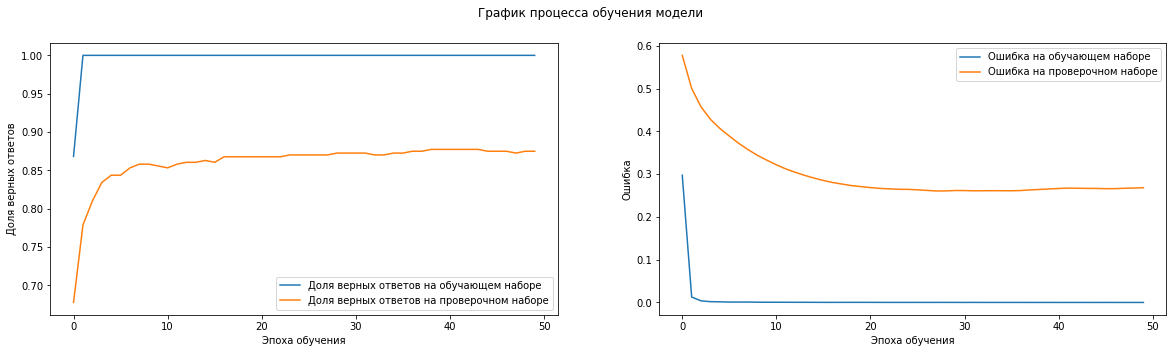

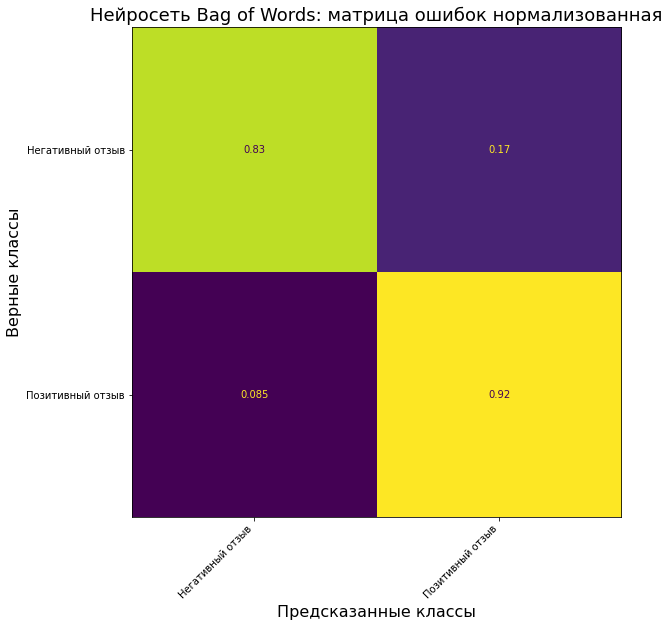

----------------------------------------------------------------------------------------------------
Нейросеть: Bag of Words
Класс: Негативный отзыв      83% сеть отнесла к классу Негативный отзыв     - ВЕРНО :-)
Класс: Позитивный отзыв      92% сеть отнесла к классу Позитивный отзыв     - ВЕРНО :-)

Средняя точность распознавания:  87%


In [ ]:
# создадим модель НС
model = Sequential()
model.add(Dense(200, input_dim=VOCAB_SIZE, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

compile_train_eval_model(model,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         class_labels=class_names,
                         title='Bag of Words')